# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=0 \; \; \; \frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f(x),\;\;\;0<x<1$$
$$f(x)= \left \{ \begin{array}{lcc}
-2, & si &   0<x \leq\frac{1}{2} \\
0, & si &  \frac{1}{2}<x<1 \\
\end{array}
\right.  $$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1 \sum_{n=1}^{\infty} -\frac{4}{n \pi}  \sin(\frac{n\pi}{2}) \cos (n \pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [81]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i]<=1/2):
          y[i] = -2
        if (x[i]>=1/2):
          y[i]=0
    return y

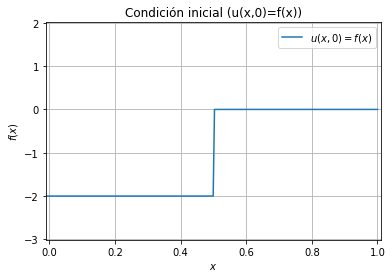

In [101]:
x = linspace(-3,1,1000)
f = recta(x)
plot(x,f,label='$ u(x,0)=f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-3.01,2.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $ u(x,0)=f(x)$.

In [83]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (4/(n*pi))*sin((n*pi)/2)*cos(n*pi*x)
    return -1-f

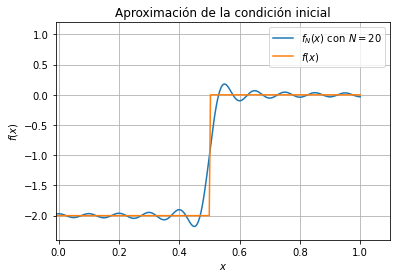

In [85]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.4,1.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

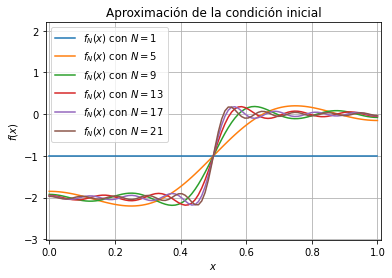

In [99]:
for i in range(1,25,4):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3.01,2.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [89]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += [4/(n*pi)*sin((n*pi)/2)]*cos(n*pi*x)*exp(-n**2*pi**2*t[i])
    return -1-f

In [90]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

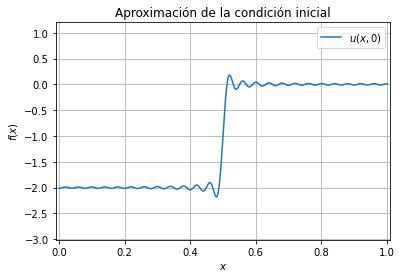

In [93]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-3.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

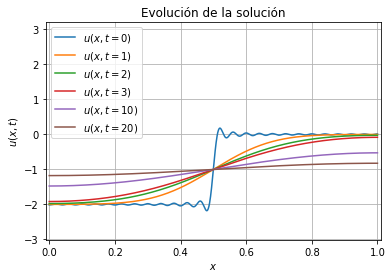

In [96]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-3.01,3.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

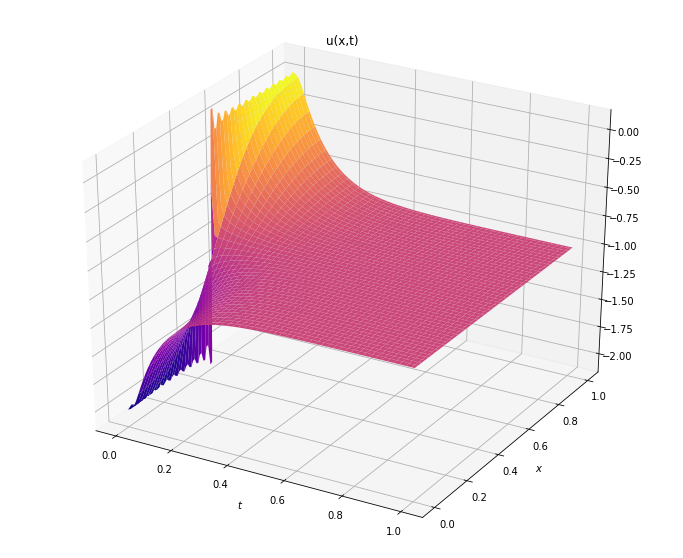

In [97]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"